In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay

diabetes_df = pd.read_csv("../week_06/diabetes.csv")
diabetes_df.head()

/var/folders/fv/3yl7kz_13sjfcjlh2s051yqw0000gn/T/ipykernel_13648/3583409827.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

#standardize

sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train) 

In [3]:
from sklearn.ensemble import RandomForestClassifier

# random forest is aggregated decision trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7489177489177489

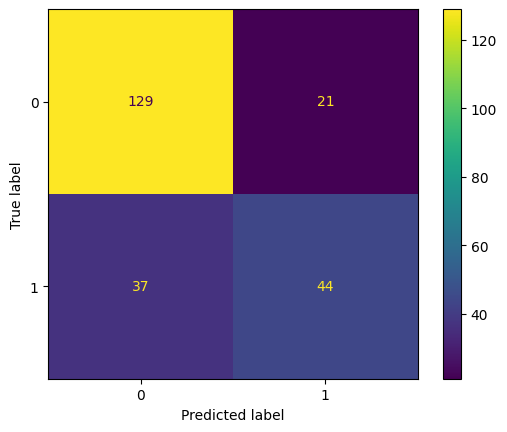

In [4]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [5]:
# recall
44/(37+44)

0.5432098765432098

In [6]:
print(rf.feature_importances_, X.columns)

[0.09694392 0.27216109 0.08907904 0.0691244  0.07307654 0.1513202
 0.11830601 0.12998879] Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


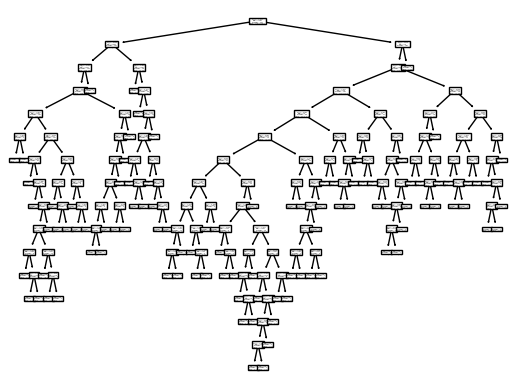

In [7]:
import matplotlib.pyplot as plt
rf_tree = rf.estimators_[4]
tree.plot_tree(rf_tree)
plt.savefig("rf_tree.svg")

In [8]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

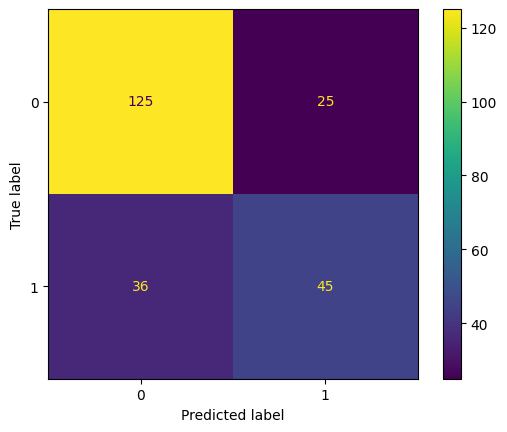

In [10]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [11]:
# recall
45/(36+45)

0.5555555555555556

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
# ROC = Receiving Operating Characteristic curve
# ROC curves summarize the trade-off between true positives
# and false positives. They are most appropriate for balanced
# datasets. Can be overly optimistic for severely 
# imbalanced classification problems

print(type(y_test))
print(type(y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(fpr, tpr)
auc

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[0.         0.16666667 1.        ] [0.         0.55555556 1.        ]


0.6944444444444444

Text(0, 0.5, 'True Positive Rate')

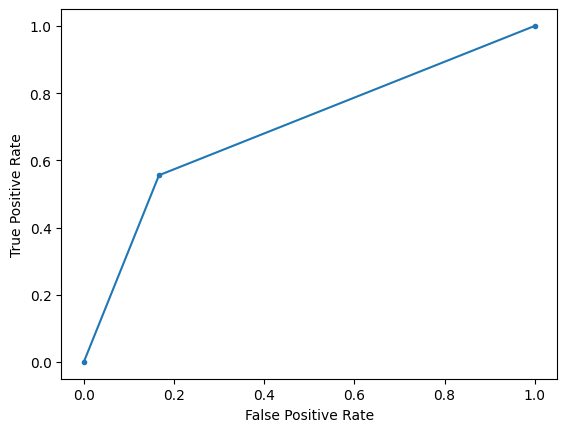

In [16]:
plt.plot(fpr, tpr, marker = ".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [17]:
# precision-recall curve summarizes the tradeoff between true
# positive rate and positive values. These are ideal for 
# imbalanced datasets (where one outcome is 10+x more likely than 
# another)
from sklearn.metrics import precision_recall_curve, f1_score, auc
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
pr_auc

0.6771284271284271

Text(0, 0.5, 'Precision')

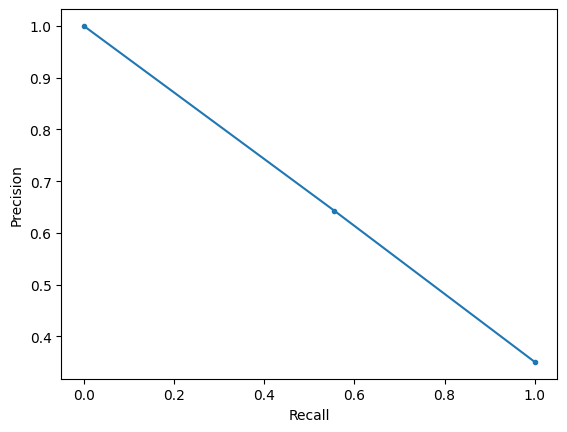

In [19]:
plt.plot(recall, precision, marker = ".")
plt.xlabel("Recall")
plt.ylabel("Precision")


In [20]:
# f1 score = 2*precision*recall/(precision+recall)
# Combined precision and recall scores are used to compute
# how many times the model made a correct prediction across
# the whole dataset
f1 = f1_score(y_test, y_pred)
f1

0.5960264900662252